# Lecture_04_Task_2.m

 Clear stuff

In [1]:
clear variables
close all

 Install subfolders

In [2]:
addpath tools

 EXERCISE: Inverse filter (LECTURE 04, Slide 33)
 (1) Apply windowing and zero-padding to the sweep to create the
 measurement signal. Implement the windowing in fade.m, and zero-padding
 in padZeros.m
 (2) Construct the inverse filter for the measurement signal (use the
 getInverse.m template).
 (3) Plot the inverse filter time and frequency domains.
 (4) Apply the inverse filter to the original sweep.
## USER PARAMETERS

In [3]:
fs = 48000; % Sampling frequency
Tsweep = 1; % Sweep duration
f0 = 1; % Start frequency
f1 = fs/2; % Stop frequency
Tsilence = 1; % Silence duration
Tin = 2E-3; % Fade-in duration
Tout = 1E-4; % Fade-out duration

 Select linear or exponential frequency increase

In [4]:
isExp = true;

## CREATE SIGNALS
 
 Generate the measurement signal

In [8]:
s_exp = genMeasSig( Tsweep, fs, f0, f1, Tsilence, Tin, Tout, isExp);

plot(s_exp(1:Tin*fs*400))
 Create the inverse filter

 Implement the following function using the provided template.

In [7]:
[hinv, Hinv] = getInverse(s_exp);

 Investigate the inverse filter by looking at the time signal, the
 magnitude spectrum, etc.
plot(abs(hinv))
 What happens if the sweep signal does not span the entire frequency range?
 Apply the inverse filter to the original sweep

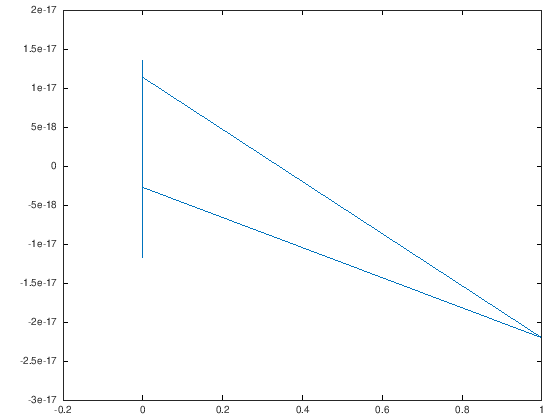

In [9]:
res = conv(s_exp, hinv);
figure
plot(res)

# Test_Black_Box.m

In [10]:
clear
close all
clc

 Install subfolders

In [ ]:
addpath signals
addpath tools

 Reset seed of random generator to guarantee reproducibility

In [ ]:
rng(0);

## USER PARAMETERS
 
 
 Sampling frequency

In [ ]:
fsHz = 48000;

 Source signal

In [ ]:
fileName = 'speech@24kHz.wav';

 Select either 'system_a', 'system_b' or 'system_c'

In [ ]:
preset = 'system_a';

## CREATE SIGNALS
 
 
 Load source signal

In [ ]:
x = readAudio(fileName,fsHz);

 Apply black box

In [ ]:
y = blackBox(x,fsHz,preset);

## PLOT RESULTS
 
 
 Show system input and output

In [ ]:
figure;
plot(x)
hold on;
plot(y)
legend({'input' 'output'})
title(strrep(preset,'_',' '))

 Play input and output sounds

In [ ]:
if 0
    soundsc(x,fsHz);
    soundsc(y,fsHz);
end

# Lecture_04_Task_3.m

 Clear stuff

In [ ]:
clear variables
close all

 Install subfolders

In [ ]:
addpath tools

 EXERCISE: Recovering the IR (LECTURE 04, Slide 34)
 (1) Create the function getIR.m that returns the IR of system given its
 output to the measurement signal and the inverse filter.
 (2) Check the 3 presets of the provided "black box" system
 (Test_Black_Box.m). Measure the IRs using your system.
 (3) Characterize the presets based on analyzing your measured IRs.
 User parameters

In [ ]:
fs = 48000; % Sampling frequency
Tsweep = 1; % Sweep duration
f0 = 10; % Start frequency
f1 = fs/2; % Stop frequency
Tsilence = 1; % Silence duration
Tin = 2E-3; % Fade-in duration
Tout = 1E-4; % Fade-out duration

 Select linear or exponential frequency increase

In [ ]:
isExp = true;

 Generate sweep signal

In [ ]:
s_exp = genMeasSig(Tsweep,fs,f0,f1,Tsilence,Tin,Tout,isExp);

 Create the inverse filter

In [ ]:
[hinv, Hinv] = getInverse(s_exp);

 Create a measurement system
 Implement the function below:

In [ ]:
h = getIR(s_exp, Hinv);

 Investigate the black box system provided in blackBox.p (check Test_Black_Box.m)

In [ ]:
bb = blackBox(s_exp, fs, 'system_b');
bbh = getIR(bb, Hinv);
plot(bbh)

# Lecture_04_Task_1.m

 Clear stuff

In [ ]:
clear variables
close all

 Install subfolders

In [ ]:
addpath tools

 EXERCISE: Exponential sweep (LECTURE 04, Slide 21)

 (1) Derive the expression for the exponential sweep
 (2) Extend the function genChirp.m to include exponential sweeps
 (3) Create a linear and an exponential chirp
 (4) Compare the two signals in the time, frequency and STFT domain
 w(t) = ae^{bt}
 a = w1
 b = ln(w2/w1)/T
## USER PARAMETERS

In [ ]:
fs = 48000; % Sampling frequency
T = 1; % Sweep duration
f0 = 10; % Start frequency
f1 = fs/2; % Stop frequency
phi0 = 0; % Phase offset

 Select linear or exponential frequency increase

In [ ]:
isExp1 = false;
isExp2 = true;

## CREATE SIGNALS
 
 Create a linear sweep

In [ ]:
linsig = genChirp(fs, f0, T, f1, phi0, false);

 Create a logarithmic sweep

In [ ]:
logsig = genChirp(fs, f0, T, f1, phi0, true);

## FREQUENCY ANALYSIS
 Calculate the magnitude spectra

In [ ]:
linfft = abs(fft(linsig, numel(linsig)));
logfft = abs(fft(logsig, numel(logsig)));

 Calculate the STFTs

In [ ]:
linstft = abs(stft(linsig));
logstft = abs(stft(logsig));

## SHOW RESULTS
 
 Plot the time-domain signals

In [ ]:
figure
subplot(2,2,1)
plot(linsig, 'DisplayName', 'Linear Chirp')
hold on
plot(logsig, 'DisplayName', 'Exponential Chirp')
title('Time Domain')
legend

 Plot the magnitude spectra

In [ ]:
subplot(2,2,2)
plot(mag2db(linfft(1:numel(linfft)/2)), 'DisplayName', 'Linear Chirp')
hold on
plot(mag2db(logfft(1:numel(linfft)/2)), 'DisplayName', 'Exponential Chirp')
title('Frequency Domain')
legend

 Plot the STFTs

In [ ]:
subplot(2,2,3)
title('Linear Chirp STFT')

image(linstft)

In [ ]:
specgram(linsig)
title('Time-Frequency (Linear)')
subplot(2,2,4)
title('Exponential Chirp STFT')

image(logstft)

In [ ]:
specgram(logsig)
title('Time-Frequency (Exponential)')